In [25]:
#Import the required libraries and modules that you would need.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline 


#Read that data into Python and call the dataframe churnData.

df=pd.read_csv(r"C:\Users\Erensu Akdogan\Downloads\DATA_Customer-Churn.csv")

In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [27]:
#Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [28]:
#TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [29]:
#drop nulls&duplicates
df=df.dropna()
df=df.drop_duplicates()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6983 non-null   object 
 1   SeniorCitizen     6983 non-null   int64  
 2   Partner           6983 non-null   object 
 3   Dependents        6983 non-null   object 
 4   tenure            6983 non-null   int64  
 5   PhoneService      6983 non-null   object 
 6   OnlineSecurity    6983 non-null   object 
 7   OnlineBackup      6983 non-null   object 
 8   DeviceProtection  6983 non-null   object 
 9   TechSupport       6983 non-null   object 
 10  StreamingTV       6983 non-null   object 
 11  StreamingMovies   6983 non-null   object 
 12  Contract          6983 non-null   object 
 13  MonthlyCharges    6983 non-null   float64
 14  TotalCharges      6983 non-null   float64
 15  Churn             6983 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usag

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000,6983.000000
mean,0.163397,32.642274,65.054103,2299.123657
std,0.369754,24.489185,30.001787,2266.798291
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,36.475000,415.550000
50%,0.000000,29.000000,70.500000,1413.000000
75%,0.000000,56.000000,89.950000,3825.025000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

dfs = pd.DataFrame({
    'tenure': df['tenure'],
    'SeniorCitizen': df['SeniorCitizen'],
    'MonthlyCharges': df['MonthlyCharges'],
    'TotalCharges': df['TotalCharges'],
    'Churn': df['Churn']
})

#Translate Churn into 1s and 0s
dfs['Churn'] = dfs['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [33]:
#X Y split

y = dfs['Churn']

X = dfs.drop(columns='Churn')


LOGISTIC REGRESSION

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



## Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


print(y_train.value_counts())


Churn
0    4128
1    1458
Name: count, dtype: int64


In [35]:
# RESAMPLE

from imblearn.over_sampling import SMOTE
smote = SMOTE()



In [36]:
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

Churn
0    4128
1    4128
Name: count, dtype: int64

In [37]:
log_model = LogisticRegression() 

scaler = MinMaxScaler()


scaler.fit(X_train)
X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)


#Fit a logistic Regression model on the training data.

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.733527,0.736578
1,Precision,0.724604,0.520906
2,Recall,0.753391,0.762755


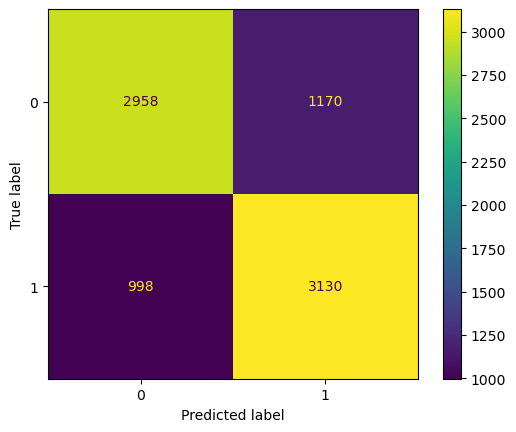

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

KNN

In [38]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL FITTING

In [43]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : [2,7,9,11,12,13,3,5,6,8,10,15]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)
grid_search.fit(X_train_scaled,y_train)
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'n_neighbors': 7}

In [47]:
#Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

model = KNeighborsClassifier(n_neighbors=7, weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
display(performance_log)

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.824007,0.706514
1,Precision,0.794668,0.483271
2,Recall,0.873789,0.663265


In [ ]:
X

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RAND_STATE = 42 # for reproducible shuffling

param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [80],
    'min_samples_leaf' : [50],
    'max_features': ['sqrt'],
    ##'max_samples' : ['None', 0.5],
   'max_depth':[3,5]
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=RAND_STATE)
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)
grid_search.fit(X_train,y_train.values.ravel())
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 80,
 'n_estimators': 100}

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


#Fit a Decision Tree Classifier on the training data.


model = DecisionTreeClassifier(max_depth=5, min_samples_split =80, min_samples_leaf = 50)

model.fit(X_train, y_train), 

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.760659,0.700072
1,Precision,0.723329,0.479389
2,Recall,0.844234,0.801020


In [50]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [ ]:
#Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth

def depth_try(x):

    for i in range (1,x): 
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(X_train, y_train)

        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        print(i)
        display(performance_df)

In [ ]:
depth_try(5)

In [ ]:
plt.figure(figsize=(10,7))
plt.barh(X.columns,model.feature_importances_)

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

In [52]:
#CROSS VALIDATION

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [53]:
scaler = MinMaxScaler()


scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [54]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring = 'recall'))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7453926186807542, 'Logistic Regression': 0.7470989801159293, 'KNN': 0.7812520360994937}
